<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_week10_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    soil_ph  organic_matter_pct  rainfall_mm  avg_temp_c  crop_yield_tph
0  6.748357            2.171005   913.548292   23.106020        7.250449
1  6.430868            2.439819   661.675201   20.819984        6.141189
2  6.823844            3.747294   930.440888   22.086234        7.244595
3  7.261515            3.610370  1003.345679   25.835356        8.086596
4  6.382923            2.979098   862.015235   22.573297        7.097720


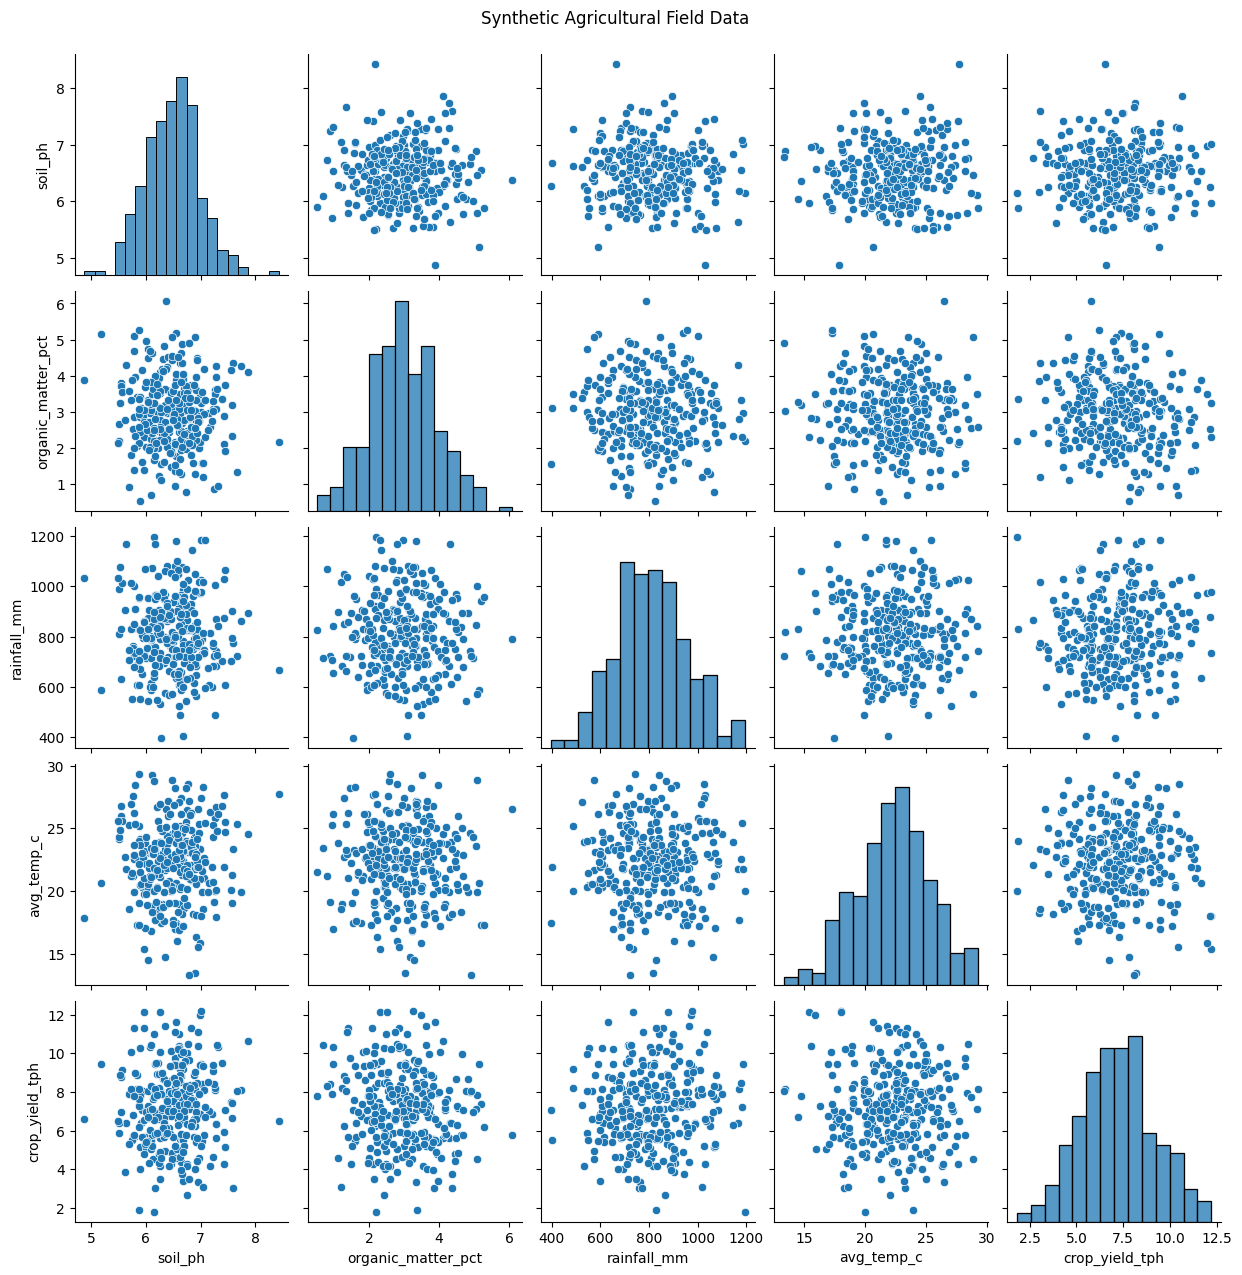

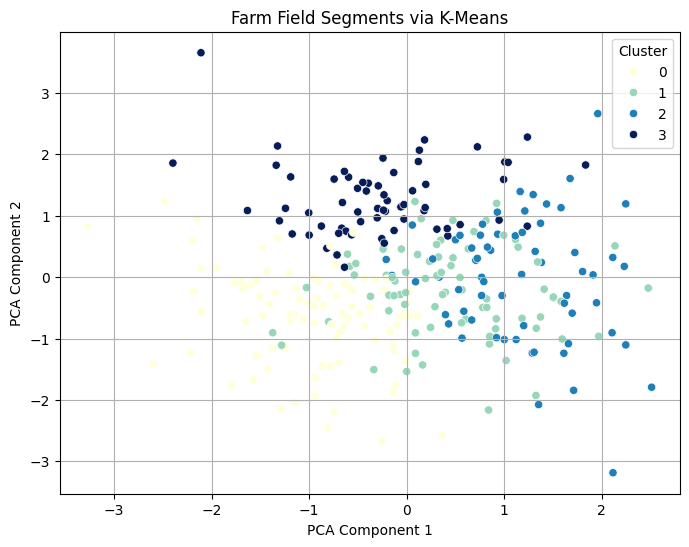


🌾 Cluster Centers (typical field profiles):
   soil_ph  organic_matter_pct  rainfall_mm  avg_temp_c  crop_yield_tph
0     6.48                2.52       905.15       22.52            8.94
1     6.26                2.41       777.89       20.68            5.71
2     6.25                4.19       803.72       22.35            6.62
3     7.06                3.12       723.34       23.88            6.90


In [5]:
# 🌾 K-Means Clustering for Agricultural Field Profiling
# Sector: Agriculture
# Goal: Segment farmland into groups for optimized crop planning

# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 🧪 Generate Synthetic Agricultural Field Data
np.random.seed(42)
n_fields = 300

# Features: soil_ph, organic_matter_pct, rainfall_mm, avg_temp_c, crop_yield_tph (tons per hectare)
soil_ph = np.random.normal(6.5, 0.5, n_fields)
organic_matter = np.random.normal(3.0, 1.0, n_fields)  # in %
rainfall = np.random.normal(800, 150, n_fields)  # mm/year
avg_temp = np.random.normal(22, 3, n_fields)  # °C
yield_tph = np.random.normal(7, 2, n_fields)  # tons/hectare

# 🧾 Create DataFrame
df = pd.DataFrame({
    'soil_ph': soil_ph,
    'organic_matter_pct': organic_matter,
    'rainfall_mm': rainfall,
    'avg_temp_c': avg_temp,
    'crop_yield_tph': yield_tph
})

# 🔍 Visualize
print(df.head())
sns.pairplot(df)
plt.suptitle("Synthetic Agricultural Field Data", y=1.02)
plt.show()

# 🧼 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🤖 K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 🔬 Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='YlGnBu')
plt.title("Farm Field Segments via K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# 🌱 Cluster Centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print("\n🌾 Cluster Centers (typical field profiles):")
print(centers.round(2))
